# Code for generating supplementary figure subpanels

# Figure A

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import statannot
import scipy.stats
plt.rc('font', family='Helvetica')

import warnings
warnings.filterwarnings('ignore')

In [2]:
h1299 = pd.read_csv('ARE-GFP_and_PEAR_flow_data/H1299_TBHQ_ARE-GFP.csv')

col_dict = {"singlets | Count":"live_cells",	"singlets/singlets2/singlets3/BFP+ | Freq. of Parent (%)":"BFP+ %",	"singlets/singlets2/singlets3/BFP+/GFP+ | Freq. of Parent (%)":"GFP+ %"}

h1299 = h1299.rename(columns = col_dict)[:-2]

treatment = ['None', 'None', 'None',
             'BSO','BSO','BSO',
             'BSO','BSO','BSO',
             'BSO','BSO','BSO',
             'BSO','BSO','BSO',
             'TBHQ', 'TBHQ', 'TBHQ',
             'TBHQ', 'TBHQ', 'TBHQ',
             'TBHQ', 'TBHQ', 'TBHQ',
             'TBHQ', 'TBHQ', 'TBHQ',
             ]

concentration = [0,0,0,
                 0,0,0,
                 10,10,10,
                 50,50,50,
                 500,500,500,
                 0,0,0,
                 5,5,5,
                 10,10,10,
                 50,50,50]

h1299['treatment'] = treatment
h1299['concentration (uM)'] = concentration


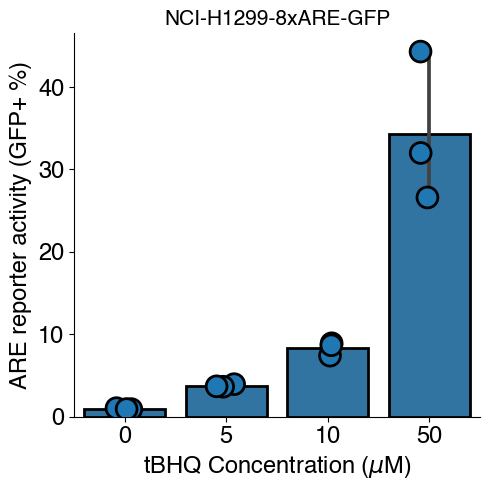

In [3]:
#plotting GFP+ %

fig, ax = plt.subplots(figsize=(5,5))
tbhq = h1299[h1299['treatment']=='TBHQ']


g = sns.barplot(data=tbhq, x='concentration (uM)', y='GFP+ %',edgecolor='black', linewidth=2, ax=ax,palette=['tab:blue'])
g = sns.stripplot(data=tbhq, x='concentration (uM)', y='GFP+ %',dodge=False, s=15, edgecolor='black', linewidth=2, ax=ax,palette=['tab:blue'])


ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=17)
ax.set_ylabel('ARE reporter activity (GFP+ %)', fontsize=17)
ax.set_xlabel('tBHQ Concentration ($\mu$M)', fontsize=17)

ax.set_title('NCI-H1299-8xARE-GFP', fontsize=15)

fig.tight_layout()
#fig.savefig('ARE_reporter.pdf')

# Figure B

In [4]:
h1299_d3 = pd.read_csv('ARE-GFP_and_PEAR_flow_data/H1299_d3.csv')
h1299_d7 = pd.read_csv('ARE-GFP_and_PEAR_flow_data/H1299_d7.csv')

col_dict = {"singlets/singlets2/singlets3/RFP+ | Freq. of Parent (%)":"RFP+ %",	"singlets/singlets2/singlets3/RFP+/GFP+ | Freq. of Parent (%)":"GFP+ %"}

#exclude the mean and std rows
#and also the colorless row (last row)
h1299_d3 = h1299_d3.rename(columns = col_dict)[:-3]
h1299_d7 = h1299_d7.rename(columns = col_dict)[:-3]

class1 = ['H1299-PEmax', 'H1299-PEmax', 'H1299-PEmax','H1299-PEmax', 'H1299-PEmax', 'H1299-PEmax','H1299-PE7', 'H1299-PE7','H1299-PE7','H1299-PE7', 'H1299-PE7','H1299-PE7', 'H1299-WT', 'H1299-WT', 'H1299-WT',]

class3 = ['H1299-PE7', 'H1299-PE7','H1299-PE7','H1299-PE7', 'H1299-PE7','H1299-PE7', 'H1299-WT', 'H1299-WT', 'H1299-WT','H1299-PEmax', 'H1299-PEmax', 'H1299-PEmax','H1299-PEmax', 'H1299-PEmax', 'H1299-PEmax',]

class4 = ['H1299-PE7\n5 ug/mL puro', 'H1299-PE7\n5 ug/mL puro','H1299-PE7\n5 ug/mL puro','H1299-PE7\n10 ug/mL puro', 'H1299-PE7\n10 ug/mL puro','H1299-PE7\n10 ug/mL puro', 
          'H1299-WT', 'H1299-WT', 'H1299-WT','H1299-PEmax\n5 ug/mL puro', 'H1299-PEmax\n5 ug/mL puro', 'H1299-PEmax\n5 ug/mL puro','H1299-PEmax\n10 ug/mL puro', 'H1299-PEmax\n10 ug/mL puro', 'H1299-PEmax\n10 ug/mL puro',]

class5 = ['H1299-PEmax\n5 ug/mL puro', 'H1299-PEmax\n5 ug/mL puro', 'H1299-PEmax\n5 ug/mL puro','H1299-PEmax\n10 ug/mL puro', 'H1299-PEmax\n10 ug/mL puro', 'H1299-PEmax\n10 ug/mL puro',
          'H1299-PE7\n5 ug/mL puro', 'H1299-PE7\n5 ug/mL puro','H1299-PE7\n5 ug/mL puro','H1299-PE7\n10 ug/mL puro', 'H1299-PE7\n10 ug/mL puro','H1299-PE7\n10 ug/mL puro', 
          'H1299-WT', 'H1299-WT', 'H1299-WT',]

h1299_d3['Cell Type'] = 'H1299'
h1299_d7['Cell Type'] = 'H1299'

h1299_d3['Days Post-Transduction'] = 4
h1299_d7['Days Post-Transduction'] = 7

h1299_d3['Condition'] = class1
h1299_d3['Puro Concentration'] = [5,5,5,10,10,10,5,5,5,10,10,10,0,0,0]
h1299_d3['Cell Line'] = class5

h1299_d7['Condition'] = class3
h1299_d7['Puro Concentration'] = [5,5,5,10,10,10,0,0,0,5,5,5,10,10,10]
h1299_d7['Cell Line'] = class4


pear = pd.concat(( h1299_d3,h1299_d7)).drop(columns = 'Unnamed: 3')

pear_selected = pear[pear['Cell Line'].isin(['H1299-PE7\n10 ug/mL puro', 'H1299-WT'])]

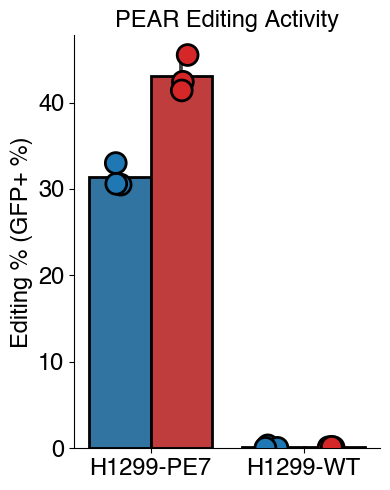

In [5]:
fig, ax = plt.subplots(figsize=(4,5))

hue_order=[4,7]

g = sns.barplot(data=pear_selected,x='Condition', y='GFP+ %', hue='Days Post-Transduction', edgecolor='black', linewidth=2, ax=ax, hue_order=hue_order, palette=['tab:blue', 'tab:red', 'tab:green', 'tab:purple'])
g = sns.stripplot(data=pear_selected,x='Condition', y='GFP+ %', dodge=True, s=15,edgecolor='black', linewidth=2,hue='Days Post-Transduction', hue_order=hue_order,ax=ax, palette=['tab:blue', 'tab:red', 'tab:green', 'tab:purple'], legend=False)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=17)
ax.set_ylabel('Editing % (GFP+ %)', fontsize=17)
ax.set_xlabel('')
ax.legend_.remove()

#ax.legend(title='Days\nPost-Transduction',fontsize=15, loc='upper right')
ax.set_title('PEAR Editing Activity', fontsize=17)
fig.tight_layout()
#fig.savefig('PEAR_reporter.pdf')

# Figure C

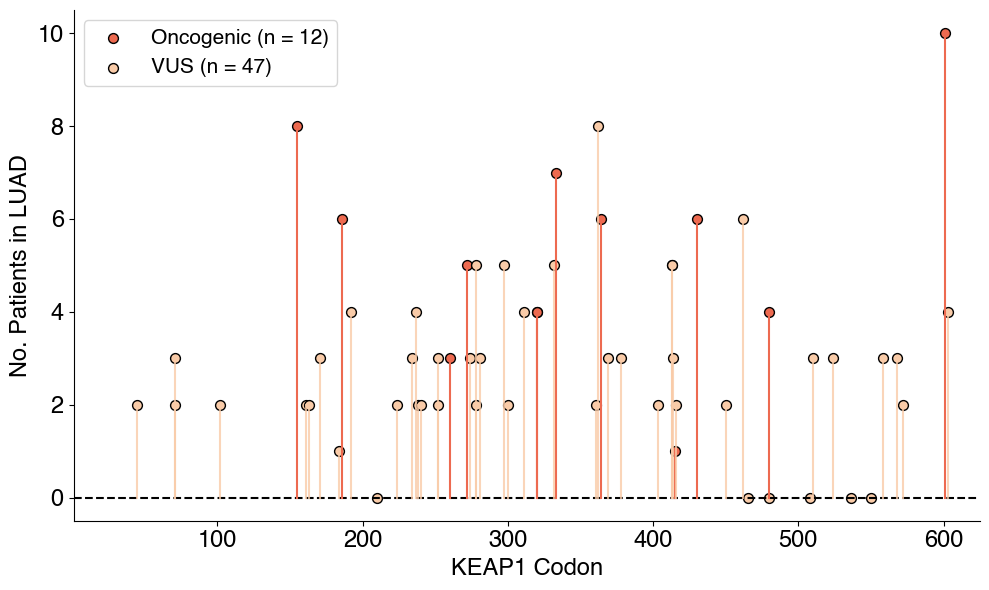

In [6]:
library = pd.read_csv('KEAP1_NRF2_library.csv')

germline_drivers = ['p.R260L', 'p.R415H']
germline_vus = ['p.A184G', 'p.R536C', 'p.S508R', 'p.G480R', 'p.H210P', 'p.M550K', 'p.V465L']

library.loc[library['HGVSp'].isin(germline_drivers), 'classification'] = 'driver'
library.loc[library['HGVSp'].isin(germline_vus), 'classification'] = 'VUS'

jj = library[library['peg_type']=='keap1_targeting'].drop_duplicates(subset='HGVSp')

d = jj[jj['classification']=='driver']
v = jj[jj['classification']=='VUS']

fig, ax = plt.subplots(figsize=(10,6))
ax.plot([1,624], [0,0], linestyle='dashed', color='black')
ax.set_xlim(1,625)


for i, val in d.iterrows():
    ax.plot([val['codon'], val['codon']], [0, val['n_patients_in_LUAD']], color='#ED6A50',alpha=1)
    
for i, val in v.iterrows():
    ax.plot([val['codon'], val['codon']], [0, val['n_patients_in_LUAD']], color= '#F9CBA8',alpha=.8)  

ax.scatter(d['codon'], d['n_patients_in_LUAD'], color='#ED6A50', label=f'Oncogenic (n = {int(len(d))})',edgecolor='black', s=50,alpha=1)
ax.scatter(v['codon'], v['n_patients_in_LUAD'], color= '#F9CBA8', label=f'VUS (n = {int(len(v))})', edgecolor='black', s=50,alpha=1)


ax.set_ylabel('No. Patients in LUAD', fontsize=17)
ax.set_xlabel('KEAP1 Codon', fontsize=17)
#plt.scatter()
ax.legend(fontsize=15, loc='upper left')
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=17)
fig.tight_layout()
#fig.savefig('supp_c.pdf')

# Figure D

In [7]:
library = pd.read_csv('KEAP1_NRF2_library.csv')
library.loc[library['peg_type']=='nrf2_targeting', 'classification'] = 'nrf2_targeting'

#renaming the germline variants to VUS or driver
germline_drivers = ['p.R260L', 'p.R415H']
germline_vus = ['p.A184G', 'p.R536C', 'p.S508R', 'p.G480R', 'p.H210P', 'p.M550K', 'p.V465L']

library.loc[library['HGVSp'].isin(germline_drivers), 'classification'] = 'driver'
library.loc[library['HGVSp'].isin(germline_vus), 'classification'] = 'VUS'

#t = library[library['classification'].isin(['driver', 'VUS', 'germline', 'neutral'])]
t = library[library['classification'].isin(['driver', 'VUS', 'germline', 'neutral','nrf2_targeting'])]

hgs = t.drop_duplicates(subset='HGVSp')

u,c = np.unique(hgs['classification'], return_counts=True)

u2, c2 = np.unique(library['classification'], return_counts=True)

d_hg = pd.DataFrame(dict(zip(['Variant Type', 'Count'], [u,c])))

d_peg = pd.DataFrame(dict(zip(['Variant Type', 'Count'], [u2,c2])))

c_dict2 = {'VUS':'VUS', 'driver':'Oncogenic', 'germline':'Germline','nrf2_targeting':'NRF2', 'neutral':'Silent', 'safe-targeting control':'ST Control', 'non-targeting control':'NT Control'}

d_peg['Variant Type'] = [c_dict2[i] for i in d_peg['Variant Type']]
d_hg['Variant Type'] = [c_dict2[i] for i in d_hg['Variant Type']]

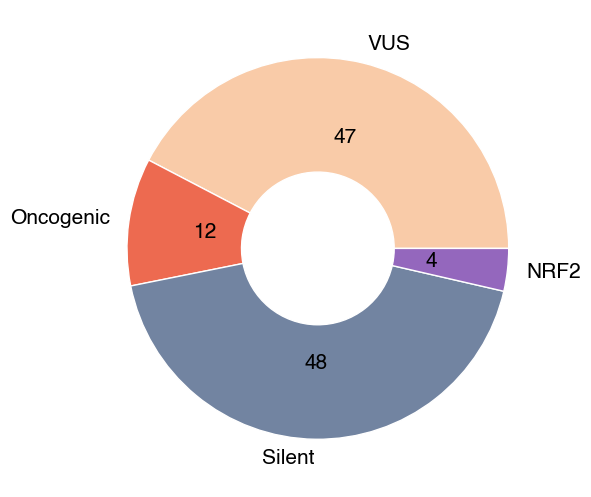

In [8]:
#first plotting variant counts
fig, ax = plt.subplots(figsize=(6,6))
size=0.6

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

palette = ['#F9CBA8', '#ED6A50',  '#7284A1','tab:purple', 'lightgrey', 'black']
ax.pie(x=d_hg['Count'], labels=d_hg['Variant Type'], radius=1, colors=palette, autopct=autopct_format(d_hg['Count']), wedgeprops=dict(width=size, edgecolor='w'), textprops={'fontsize': 15});
fig.tight_layout()

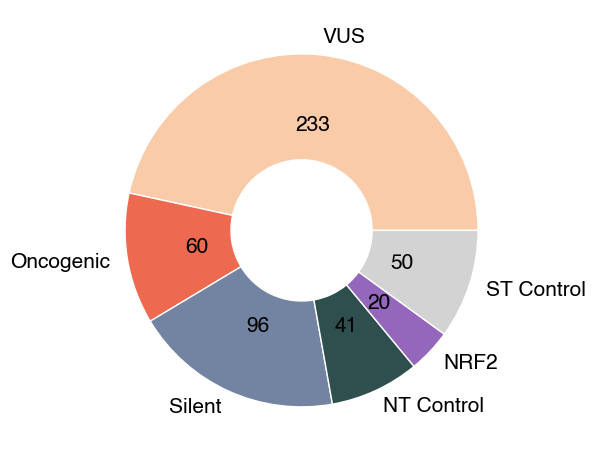

In [9]:
#then plotting pegRNA counts
fig, ax = plt.subplots(figsize=(6,6))
size=0.6

palette = ['#F9CBA8', '#ED6A50',   '#7284A1', 'darkslategrey', 'tab:purple','lightgrey' ]
ax.pie(x=d_peg['Count'], labels=d_peg['Variant Type'], radius=1, colors=palette,autopct=autopct_format(d_peg['Count']),wedgeprops=dict(width=size, edgecolor='w'), textprops={'fontsize': 15});
fig.tight_layout()

# Figure E, F

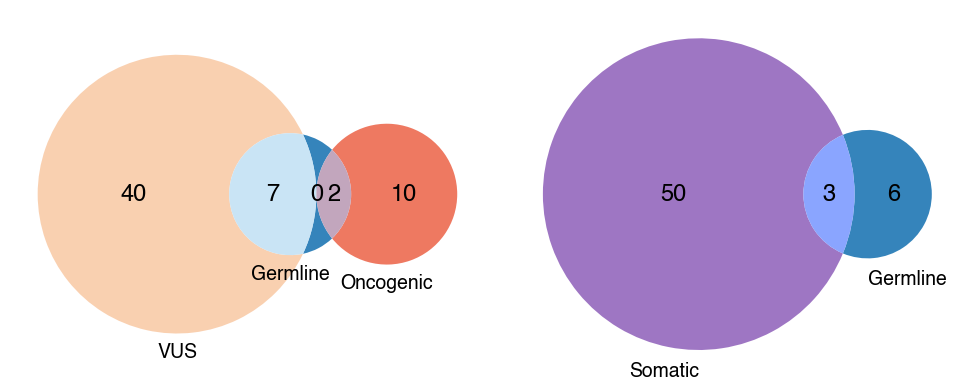

In [10]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib_venn import venn2

library = pd.read_csv('KEAP1_NRF2_library.csv')

keap1_targeting = library[library['classification'].isin(['driver', 'VUS', 'germline',])].drop_duplicates(subset='HGVSp')

num_vus = len(keap1_targeting[keap1_targeting['classification']=='VUS']) 
num_driver = len(keap1_targeting[keap1_targeting['classification']=='driver']) 
num_driver = len(keap1_targeting[keap1_targeting['classification']=='driver']) 

fig, ax = plt.subplots(1,2, figsize=(10,4))
# Make the diagram
out = venn3(subsets = (num_vus, num_driver, 0, 0,7,2,0), set_labels=('VUS', 'Oncogenic', 'Germline'),
      set_colors=('#F9CBA8', '#ED6A50', 'tab:blue',), alpha=0.9, ax=ax[0])

for t in out.set_labels: t.set_fontsize(14)
#for t in v_test1.subset_labels: t.set_fontsize(20)
for x in range(len(out.subset_labels)):
    if out.subset_labels[x] is not None:
        out.subset_labels[x].set_fontsize(17)

out = venn2(subsets = (num_vus + num_driver, 6,3), set_labels=('Somatic', 'Germline'),
      set_colors=('tab:purple', 'tab:blue',), alpha=0.9, ax=ax[1])

for t in out.set_labels: t.set_fontsize(14)
#for t in v_test1.subset_labels: t.set_fontsize(20)
for x in range(len(out.subset_labels)):
    if out.subset_labels[x] is not None:
        out.subset_labels[x].set_fontsize(17)


fig.tight_layout()

# Figure G

In [11]:
#first compiling crispresso into useable format
def crispresso_compiler(samp, sample_id):
    """ 
    Takes in list of sample names (see cell above)
    Returns compiled dictionary of dataframes containing editing information for each sensor
    
    Includes:
    1. corr_perc = pure correct editing
    2. target_base_edit_perc = target base editing perc (including edits with bystander editing)
    3. wt_perc
    4. byproduct information (indels, substitutions, ambiguous)
    """

    df_edits = []
    for k in samp: 
        concated = pd.read_csv(f'crispresso/{k}_crispresso_aggregated.csv')
        concated = concated.fillna(0)

        #somehow wasn't able to find the initial set of code that I used for this...

        #go through all of the samples and do it step by step
        sample_ids = []
        #sample_num = []
        rii = []
        raaa = []
        r_lowqual = []
        ra_hdr = []
        ra_wt = []
        r_unaligned = []
        no_edit = []
        correct = []
        target_base_editing = []
        byproduct_all = []
        byproduct_indel = []
        byproduct_sub = []
        byproduct_ambig = []
        for i in np.unique(concated['peg_id']):
            sample_ids.append(i)

            subset = concated[concated['peg_id']==i]

            wt = subset[subset['Amplicon']=='Reference']
            edit = subset[subset['Amplicon']=='HDR']

            #sample_num.append(wt['sample_num'].values[0])
            rii1 = wt['Reads_in_input'].values[0]
            r1 = wt['Reads_aligned_all_amplicons'].values[0]
            rii.append(rii1)
            raaa.append(r1)
            r_lowqual.append(rii1-r1)

            r2 = edit['Reads_aligned'].values[0]
            r3 = wt['Reads_aligned'].values[0]
            ra_hdr.append(r2)
            ra_wt.append(r3)
            r_unaligned.append(r1 - (r2+r3))

            no_edit.append(wt['Unmodified'].values[0])
            correct.append(edit['Unmodified'].values[0])
            target_base_editing.append(edit['Modified'].values[0] + edit['Unmodified'].values[0])

            byprod_all = wt['Modified'].values[0] + edit['Modified'].values[0] + (r1 - (r2+r3)) #add unaligned reads
            sub_all = wt['Only Substitutions'].values[0] + edit['Only Substitutions'].values[0]
            indel_all = wt['Only Deletions'].values[0] + wt['Only Insertions'].values[0] + wt['Insertions and Deletions'].values[0] + edit['Only Deletions'].values[0] + edit['Only Insertions'].values[0] + edit['Insertions and Deletions'].values[0]
            ambig_all = byprod_all - sub_all - indel_all

            byproduct_all.append(byprod_all)
            byproduct_indel.append(indel_all)
            byproduct_sub.append(sub_all)
            byproduct_ambig.append(ambig_all)


        cols = ["pegRNA_id", "Reads_in_input","Reads_lowqual", "Reads_aligned_all_amplicons","Reads_aligned_WT", "Reads_aligned_HDR", "Reads_unaligned", "WT","correct_edit", "target_base_edit", "byproduct_all","byproduct_INDEL","byproduct_sub","byproduct_ambiguous"]
        col_vals = [ sample_ids, rii, r_lowqual, raaa, ra_wt, ra_hdr, r_unaligned, no_edit, correct, target_base_editing, byproduct_all, byproduct_indel, byproduct_sub, byproduct_ambig]

        out = pd.DataFrame(dict(zip(cols, col_vals)))
        out['corr_perc'] = 100*(out['correct_edit']/out['Reads_aligned_all_amplicons'])
        out['target_base_edit_perc'] = 100*(out['target_base_edit']/out['Reads_aligned_all_amplicons'])
        out['WT_perc'] = 100*(out['WT']/out['Reads_aligned_all_amplicons'])
        out['byproduct_all_perc'] =  100*(out['byproduct_all']/out['Reads_aligned_all_amplicons'])
        out['byproduct_INDEL_perc'] =  100*(out['byproduct_INDEL']/out['Reads_aligned_all_amplicons'])
        out['byproduct_sub_perc'] =  100*(out['byproduct_sub']/out['Reads_aligned_all_amplicons'])
        out['byproduct_ambiguous_perc'] =100*(out['byproduct_ambiguous']/out['Reads_aligned_all_amplicons'])
        out = out.fillna(0)

        df_edits.append(out)

    edit_dict = dict(zip(sample_id, df_edits))

    return edit_dict

In [12]:
l2 = sorted(os.listdir('crispresso'))
samp = [i.split('_')[0] for i in l2]

d = {'D24-8256' : 'REP1_Q1',
'D24-8257' : 'REP1_Q2',
'D24-8258' : 'REP1_Q3',
'D24-8259' : 'REP1_Q4', 
'D24-8260' : 'REP2_Q1',
'D24-8261' : 'REP2_Q2',
'D24-8262' : 'REP2_Q3',
'D24-8263' : 'REP2_Q4',
'D24-8264' : 'REP3_Q1',
'D24-8265' : 'REP3_Q2',
'D24-8266' : 'REP3_Q3',
'D24-8267' : 'REP3_Q4',
'D24-8268' : 'REP1_PreSort',
'D24-8269' : 'REP2_PreSort',
'D24-8270' : 'REP3_PreSort',
'D24-8271' : 'Plasmid_Library'}

sample_id = list(d.values())

#edit_dict contains dataframe of editing information for each pegRNA for each sample
edit_dict = crispresso_compiler(samp, sample_id)

In [13]:
#merging the replicates from the pre-sort populations
#to generate a maximum likelihood estimate for the editing efficiency of each pegRNA pre-sort

#making a presort best estimate
cols = ["Reads_in_input","Reads_lowqual", "Reads_aligned_all_amplicons","Reads_aligned_WT", "Reads_aligned_HDR", "Reads_unaligned", "WT","correct_edit", "target_base_edit", "byproduct_all","byproduct_INDEL","byproduct_sub","byproduct_ambiguous"]

list(edit_dict['REP1_PreSort']['pegRNA_id']) == list(edit_dict['REP2_PreSort']['pegRNA_id']) == list(edit_dict['REP3_PreSort']['pegRNA_id'])

out = edit_dict['REP1_PreSort'][cols] + edit_dict['REP2_PreSort'][cols]+edit_dict['REP3_PreSort'][cols]
out['pegRNA_id'] = edit_dict['REP1_PreSort']['pegRNA_id']

out['corr_perc'] = 100*(out['correct_edit']/out['Reads_aligned_all_amplicons'])
out['target_base_edit_perc'] = 100*(out['target_base_edit']/out['Reads_aligned_all_amplicons'])
out['WT_perc'] = 100*(out['WT']/out['Reads_aligned_all_amplicons'])
out['byproduct_all_perc'] =  100*(out['byproduct_all']/out['Reads_aligned_all_amplicons'])
out['byproduct_INDEL_perc'] =  100*(out['byproduct_INDEL']/out['Reads_aligned_all_amplicons'])
out['byproduct_sub_perc'] =  100*(out['byproduct_sub']/out['Reads_aligned_all_amplicons'])
out['byproduct_ambiguous_perc'] =100*(out['byproduct_ambiguous']/out['Reads_aligned_all_amplicons'])
out = out.fillna(0)

presort_mle_edit = out

In [14]:
avg_vus = []
avg_driver = []
avg_germline = []
avg_silent = []

counts_threshold = 100

for k in list(edit_dict.keys()):
    jj = pd.merge(library, edit_dict[k], on='pegRNA_id')
    jj = jj[jj['Reads_aligned_all_amplicons']>=counts_threshold]

    vus = jj[jj['classification']=='VUS']
    driver = jj[jj['classification']=='driver']
    silent = jj[jj['classification']=='neutral']
    germline = jj[jj['classification']=='germline']

    avg_vus.append(np.average(vus['corr_perc']))
    avg_driver.append(np.average(driver['corr_perc']))
    avg_germline.append(np.average(germline['corr_perc']))
    avg_silent.append(np.average(silent['corr_perc']))


df_vus = pd.DataFrame(dict(zip(['sample', 'average_corr_edit'], [edit_dict.keys(), avg_vus])))
df_driver = pd.DataFrame(dict(zip(['sample', 'average_corr_edit'], [edit_dict.keys(), avg_driver])))
df_germline = pd.DataFrame(dict(zip(['sample', 'average_corr_edit'], [edit_dict.keys(), avg_germline])))
df_silent = pd.DataFrame(dict(zip(['sample', 'average_corr_edit'], [edit_dict.keys(), avg_silent])))

t = [i.split('_')[1] for i in list(edit_dict.keys())[:-4]]
t.append('Pre-Sort')
t.append('Pre-Sort')
t.append('Pre-Sort')
t.append('Plasmid')

df_vus['Sample_Type'] = t
df_driver['Sample_Type'] = t
df_germline['Sample_Type'] = t
df_silent['Sample_Type'] = t

df_vus['Variant Type'] = 'VUS'
df_driver['Variant Type'] = 'Driver'
df_germline['Variant Type'] = 'Germline'
df_silent['Variant Type'] = 'Silent'

comb_edit_df = pd.concat((df_vus, df_driver, df_germline, df_silent))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Q1 v.s. Q4: t-test independent samples with Bonferroni correction, P_val=2.066e-02 stat=-3.709e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Q1 v.s. Q4: t-test independent samples with Bonferroni correction, P_val=2.551e-02 stat=-3.473e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Q1 v.s. Q4: t-test independent samples with Bonferroni correction, P_val=3.438e-01 stat=-1.073e+00


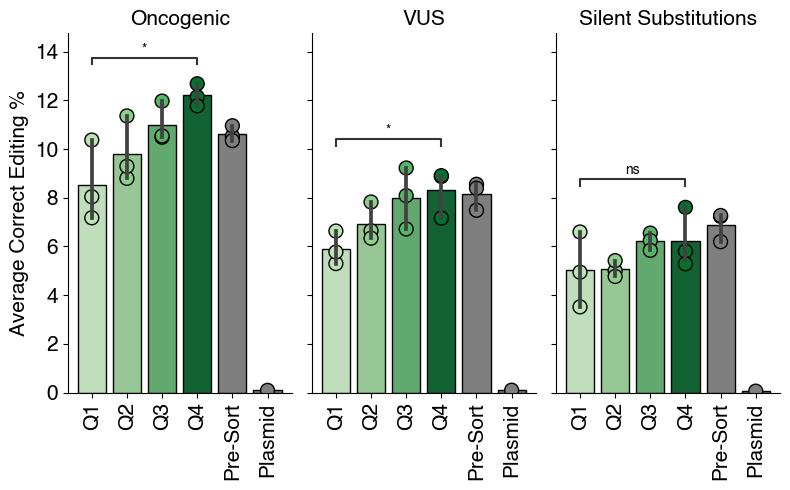

In [15]:
fig, ax = plt.subplots(1,3, figsize=(8,5), sharey=True)

pal = sns.color_palette('Greens')
j = pal.as_hex()
palette = [j[1], j[2], j[3], j[5], 'tab:grey', 'tab:grey']

dd = comb_edit_df

sns.barplot(data = df_driver, x='Sample_Type', y='average_corr_edit', edgecolor='black', linewidth=1, ax=ax[0], palette=palette)
sns.scatterplot(data = df_driver, x='Sample_Type', y='average_corr_edit', hue='Sample_Type', s=100,legend=False, palette=palette, edgecolor='black', linewidth=1, ax=ax[0])

sns.barplot(data = df_vus, x='Sample_Type', y='average_corr_edit', edgecolor='black', linewidth=1, ax=ax[1], palette=palette)
sns.scatterplot(data = df_vus, x='Sample_Type', y='average_corr_edit', hue='Sample_Type', s=100,legend=False, palette=palette, edgecolor='black', linewidth=1, ax=ax[1])

sns.barplot(data = df_silent, x='Sample_Type', y='average_corr_edit', edgecolor='black', linewidth=1, ax=ax[2], palette=palette)
sns.scatterplot(data = df_silent, x='Sample_Type', y='average_corr_edit', hue='Sample_Type', s=100,legend=False, palette=palette, edgecolor='black', linewidth=1, ax=ax[2])

ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[2].spines[['top', 'right']].set_visible(False)
ax[2].tick_params(axis='both', which='major', labelsize=15)



ax[0].set_ylabel('Average Correct Editing %', fontsize=15)
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')

ax[0].set_title('Oncogenic', fontsize=15)
ax[1].set_title('VUS', fontsize=15)
ax[2].set_title('Silent Substitutions', fontsize=15)

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

statannot.add_stat_annotation(
    ax[0],
    data=df_driver,
    x='Sample_Type',
    y='average_corr_edit',
    #hue=hue,
    box_pairs=[
        (("Q4"), ("Q1")),
    ],
    test="t-test_ind",
    text_format="star",
    loc="inside",
)

statannot.add_stat_annotation(
    ax[1],
    data=df_vus,
    x='Sample_Type',
    y='average_corr_edit',
    #hue=hue,
    box_pairs=[
        (("Q4"), ("Q1")),
    ],
    test="t-test_ind",
    text_format="star",
    loc="inside",
)


statannot.add_stat_annotation(
    ax[2],
    data=df_silent,
    x='Sample_Type',
    y='average_corr_edit',
    #hue=hue,
    box_pairs=[
        (("Q4"), ("Q1")),
    ],
    test="t-test_ind",
    text_format="star",
    loc="inside",
)
plt.subplots_adjust(wspace=0)
fig.tight_layout()

# Figure H

In [16]:
#loading in MAGeCK data and merging with library
m1 = pd.merge(library,presort_mle_edit,  on='pegRNA_id')

q4_presort_mageck = pd.read_csv('mageck/Q4_presort_PAIRED_controls.sgrna_summary.txt', sep='\t').sort_values(by='LFC', ascending=False)
q3_presort_mageck = pd.read_csv('mageck/Q3_presort_PAIRED_controls.sgrna_summary.txt', sep='\t').sort_values(by='LFC', ascending=False)
q2_presort_mageck = pd.read_csv('mageck/Q2_presort_PAIRED_controls.sgrna_summary.txt', sep='\t').sort_values(by='LFC', ascending=False)
q1_presort_mageck = pd.read_csv('mageck/Q1_presort_PAIRED_controls.sgrna_summary.txt', sep='\t').sort_values(by='LFC', ascending=False)
q1q2_presort_mageck = pd.read_csv('mageck/Q1Q2_presort_PAIRED_controls.sgrna_summary.txt', sep='\t').sort_values(by='LFC', ascending=False)

#specifically for --paired option, need to do this (each replicate is dealt with separately)
q4_presort_mageck['pegRNA_id'] = [i[:-3] for i in q4_presort_mageck['sgrna']]
q3_presort_mageck['pegRNA_id'] = [i[:-3] for i in q3_presort_mageck['sgrna']]
q2_presort_mageck['pegRNA_id'] = [i[:-3] for i in q2_presort_mageck['sgrna']]
q1_presort_mageck['pegRNA_id'] = [i[:-3] for i in q1_presort_mageck['sgrna']]
q1q2_presort_mageck['pegRNA_id'] = [i[:-3] for i in q1q2_presort_mageck['sgrna']]

q4 = pd.merge(m1,q4_presort_mageck,  on='pegRNA_id')
q3 = pd.merge(m1,q3_presort_mageck,  on='pegRNA_id')
q2 = pd.merge(m1,q2_presort_mageck,  on='pegRNA_id')
q1 = pd.merge(m1,q1_presort_mageck,  on='pegRNA_id')
q1q2 = pd.merge(m1,q1q2_presort_mageck,  on='pegRNA_id')

q4['bin'] = 'Q4 - High'
q3['bin'] = 'Q3 - Mid-high'
q2['bin'] = 'Q2 - Mid-low'
q1['bin'] = 'Q1 - Low'
q1q2['bin'] = 'Q1 + Q2 – Low'

m2 = pd.concat((q4, q3, q2, q1, q1q2))

m2['replicate'] = [i[-2:] for i in m2['sgrna']]

#want to filter out things that enrich in ALL of the bins
#these are possibly PCR induced errors or noisy artifacts

uniq_sgrnas = np.unique(m2['sgrna'])

cutoff=0.1

sg_list = []
for i in uniq_sgrnas:

    subset1 = m2[m2['sgrna']==i]

    q1 = subset1.loc[subset1['bin']=='Q1 - Low', 'LFC'].values[0]
    q2 = subset1.loc[subset1['bin']=='Q2 - Mid-low', 'LFC'].values[0]
    q3 = subset1.loc[subset1['bin']=='Q3 - Mid-high', 'LFC'].values[0]
    q4 = subset1.loc[subset1['bin']=='Q4 - High', 'LFC'].values[0]

    if (q1>cutoff) & (q2>cutoff) & (q3>cutoff) & (q4>cutoff):
        sg_list.append(i)

In [17]:
min_control_counts = 30
min_corr_perc = 5
counts_threshold = 100

#filter pegRNAs below control count threshold (30)
m3 = m2[m2['control_mean']>=min_control_counts]
#filter pegRNAs that enrich in all bins
m3 = m3[~m3['sgrna'].isin(sg_list)]
#designate control pegRNAs
controls = m3[m3['peg_type'].isin(['safe_targeting', 'non_targeting'])]

#filter pegRNAs below editing editing threshold (min_corr_perc)
targeting = m3[~m3['peg_type'].isin(['safe_targeting', 'non_targeting'])]
targeting = targeting[targeting['corr_perc']>min_corr_perc]

#filter pegRNAs without sufficient sensor reads
targeting = targeting[targeting['Reads_aligned_all_amplicons']>=counts_threshold]

m3 = pd.concat((controls, targeting))

Missense Guides R = 0.514
Silent Substitution Guides R = -0.152


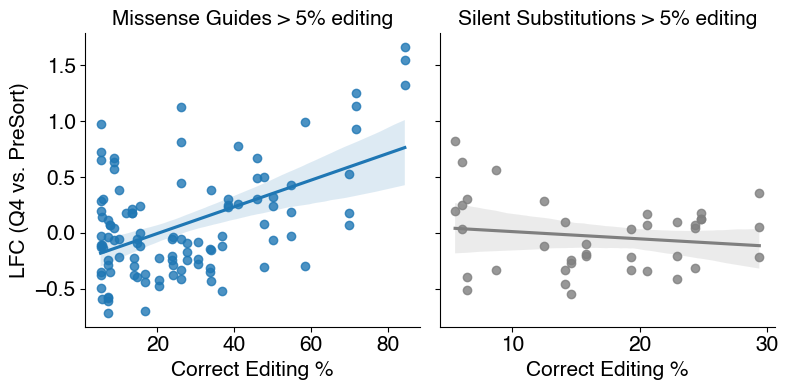

In [18]:
fig, ax =plt.subplots(1,2,figsize=(8,4), sharey=True)

#first part of plot (left)
targeting = m3[m3['classification'].isin(['VUS', 'driver', 'germline'])]
targeting = targeting[targeting['bin']=='Q4 - High']

sns.regplot(data=targeting, x='corr_perc', y='LFC', ax=ax[0])
ax[0].set_xlabel('Correct Editing %', fontsize=15)
ax[1].set_xlabel('Correct Editing %', fontsize=15)

ax[0].set_ylabel('LFC (Q4 vs. PreSort)', fontsize=15)

pear = np.round(scipy.stats.pearsonr(targeting['corr_perc'], targeting['LFC']).statistic, 3)
ax[0].set_title(f'Missense Guides > 5% editing', fontsize=15)
scipy.stats.pearsonr(targeting['corr_perc'], targeting['LFC'])

ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=15)

#second part of plot (right)
targeting2 = m3[m3['classification'].isin(['neutral'])]
targeting2 = targeting2[targeting2['bin']=='Q4 - High']

sns.regplot(data=targeting2, x='corr_perc', y='LFC', color='tab:gray', ax=ax[1])


pear2 = np.round(scipy.stats.pearsonr(targeting2['corr_perc'], targeting2['LFC']).statistic, 3)

ax[1].set_xlabel('Correct Editing %', fontsize=15)

ax[1].set_title(f'Silent Substitutions > 5% editing', fontsize=15)
ax[1].set_ylabel('')
fig.tight_layout()

print(f'Missense Guides R = {pear}')
print(f'Silent Substitution Guides R = {pear2}')


# Figure I

In [19]:
validation_flow = pd.read_csv('keap1_2024_7_23_validation_day10.csv')
validation_flow.loc[validation_flow['Sample']=='ST', 'Sample'] = 'ST Control'
validation_flow.loc[validation_flow['Sample']=='NT', 'Sample'] = 'NT Control'

#and loading in sensor editing rate (pre-sort MLE)
PBS_RTT = ['AATGGCATCGGCATCGCCAACTT', 'CCAGCAATGCCATCTGCATCGCCAA']
proto = ['GGCGAAGTTGGCGATGCCGA','GGCGAAGTTGGCGATGCCGA']
hg = ['A184G','G186C']

d_val = pd.DataFrame(dict(zip(['HGVSp', 'Protospacer', 'RTT_PBS'], [hg, proto, PBS_RTT])))
d = pd.merge(d_val, m1, on='RTT_PBS')[['HGVSp_x', 'Reference_Allele', 'Tumor_Seq_Allele2', 'corr_perc']]
d['expected_homozygous'] = (d['corr_perc']/100)**2
d

,HGVSp_x,Reference_Allele,Tumor_Seq_Allele2,corr_perc,expected_homozygous
0,A184G,G,C,84.369748,0.711825
1,G186C,C,A,54.756381,0.299826


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

A184G v.s. A184A: t-test independent samples with Bonferroni correction, P_val=3.024e-06 stat=4.936e+01
G186C v.s. G186G: t-test independent samples with Bonferroni correction, P_val=7.399e-03 stat=6.783e+00
A184G v.s. G186C: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=5.171e-01


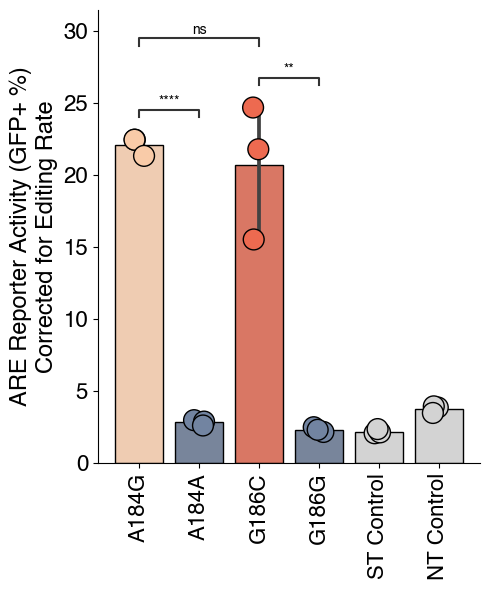

In [21]:
subset = validation_flow[validation_flow['Sample'].isin(['A184G', 'A184A', 'G186C', 'G186G', 'ST Control', 'NT Control',])]

subset['GFP+ % corrected'] = subset['GFP+ %']
for i, val in d.iterrows():

    h = val['HGVSp_x']
    eh = val['expected_homozygous']

    subset.loc[subset['Sample']==h, 'GFP+ % corrected'] = subset.loc[subset['Sample']==h, 'GFP+ %']/eh

fig, ax = plt.subplots(figsize=(5,6))

order = ['A184G', 'A184A', 'G186C', 'G186G', 'ST Control', 'NT Control',]
palette = ['#F9CBA8', '#7284A1','#ED6A50', '#7284A1', 'lightgrey', 'lightgrey']

sns.barplot(data = subset, x='Sample', y='GFP+ % corrected', color='tab:blue', edgecolor='black', linewidth=1, ax=ax, order=order, palette=palette)
sns.stripplot(data = subset, x='Sample', y='GFP+ % corrected', ax=ax, s=15, linewidth=1, dodge=False, edgecolor='black',order=order,palette=palette)
ax.set_xlabel('')
ax.set_ylabel('ARE Reporter Activity (GFP+ %)\nCorrected for Editing Rate', fontsize=17)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', labelsize=16)

ax.set_xticklabels(labels=order, rotation=90)

statannot.add_stat_annotation(
    ax,
    data=subset,
    x='Sample',
    y='GFP+ % corrected',
    order=order,
    #hue=hue,
    box_pairs=[
        (("A184G"), ("A184A")),
        (("G186C"), ("G186G")),
        (("G186C"), ("A184G")),
       # (("G186C"), ("ST")),
        #(("G186C"), ("NT")),
        #(("A184G"), ("NT + tBHQ"))
    ],
    test="t-test_ind",
    text_format="star",
    loc="inside",
)

fig.tight_layout()